In [1]:
# Translate "PlotAnalyticalModel2Curves_v1.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

In [15]:
Vmax = 0.83;           # Maximum gliding speed (um/s) # Scharrel et al., Biophy, 2014
k = 100.0;          # Spring constant (pN/um)
fstall = -5;      # Stall force (pN)
frupt = -7;       # Rupture force (pN)
Tau1 = 0.2;       # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.

$fv = f_{stall}\times (1 - \frac{V}{V_{max}})$ <br>

$(\frac{1}{R} - 1)\times 0.5\times f_{rupt}\times \frac{\frac{f_{rupt}}{k\times \tau_1}}{(\frac{f_{rupt}}{k\times \tau_1} - V)}$

In [261]:
# Values of active motor ratio investigated
#ActiveMotorRatio = np.array([0.8, 0.853721, 0.9, 0.95]);

#ActiveMotorRatio = np.arange(0.35,0.42,0.01); # critical = 0.37 from v2

# Gliding speed
V = np.arange(0.0,Vmax,0.02); # 0.1 is sparse

# f-V relation
fV = fstall*(1.0 - (V/Vmax));

# V-fimp relation
fFric = []

In [262]:
for I in range(len(ActiveMotorRatio)):
    fFric.append( (1/ActiveMotorRatio[I] - 1.0)*0.5*frupt*frupt/k/Tau1/(frupt/k/Tau1 - V) )

In [263]:
len(ActiveMotorRatio)

8

In [264]:
len(fFric)

8

In [265]:
len(fFric[0])

40

In [266]:
fV

array([-5.   , -4.875, -4.75 , -4.625, -4.5  , -4.375, -4.25 , -4.125,
       -4.   , -3.875, -3.75 , -3.625, -3.5  , -3.375, -3.25 , -3.125,
       -3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
       -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 , -1.125,
       -1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125])

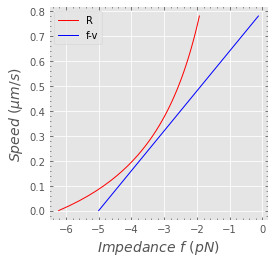

In [267]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[1],V,'r-', lw=1, label='R') # impedance 
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-no-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

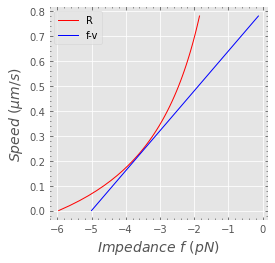

In [268]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[2],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-1-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

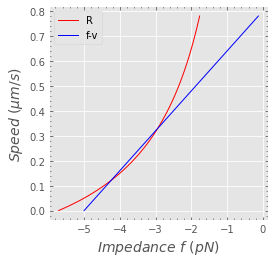

In [269]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[3],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-2-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

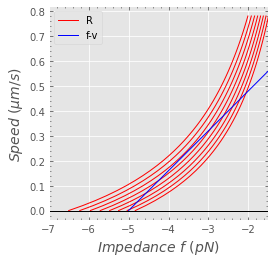

In [271]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for I in range(len(ActiveMotorRatio)):
    if I==0:
        ax.plot(fFric[I],V,'r-', lw=1, label='R')
    else:
        ax.plot(fFric[I],V,'r-', lw=1)
ax.plot(fV,V,'b-',lw=1, label='f-v')

#ax.set_xticks(np.arange(-7,-1,1))
ax.set_xlim(-7,-1.5)
ax.axhline(y=0, color='k', lw=1)
ax.axvline(x=0, color='k', lw=1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14); ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')
#plt.savefig('fig/analy-all-sol.pdf', format='pdf', bbox_inches='tight')

#plt.savefig('fig/analy-all-sol_MT.pdf', format='pdf', bbox_inches='tight')

plt.show()